<a href="https://colab.research.google.com/github/adeshshah2912/DS_Python/blob/main/Assignment_18_Forecasting_Coco_Cola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel (r'/content/CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales,t,t_square,logSales,year,QuartNo
0,Q1_86,1734.827000,1,1,3.239256,1986,Q1
1,Q2_86,2244.960999,2,4,3.351209,1986,Q2
2,Q3_86,2533.804993,3,9,3.403773,1986,Q3
3,Q4_86,2154.962997,4,16,3.333440,1986,Q4
4,Q1_87,1547.818996,5,25,3.189720,1987,Q1


In [21]:
df1=pd.get_dummies(df,columns=['QuartNo'])

In [22]:
df1.head()

,Quarter,Sales,t,t_square,logSales,year,QuartNo_Q1,QuartNo_Q2,QuartNo_Q3,QuartNo_Q4
0,Q1_86,1734.827000,1,1,3.239256,1986,1,0,0,0
1,Q2_86,2244.960999,2,4,3.351209,1986,0,1,0,0
2,Q3_86,2533.804993,3,9,3.403773,1986,0,0,1,0
3,Q4_86,2154.962997,4,16,3.333440,1986,0,0,0,1
4,Q1_87,1547.818996,5,25,3.189720,1987,1,0,0,0


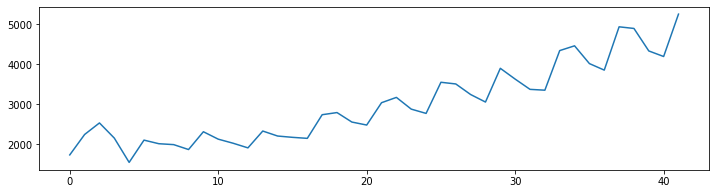

In [33]:
plt.figure(figsize=(12,3))
df1.Sales.plot()

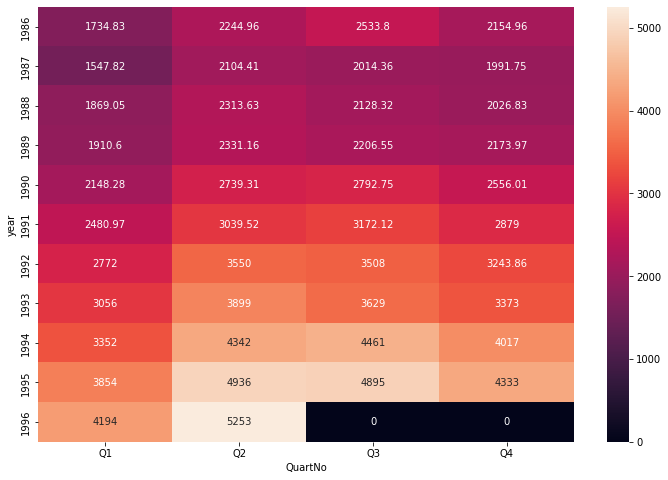

In [35]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="year",columns="QuartNo",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.savefig("image1.png")

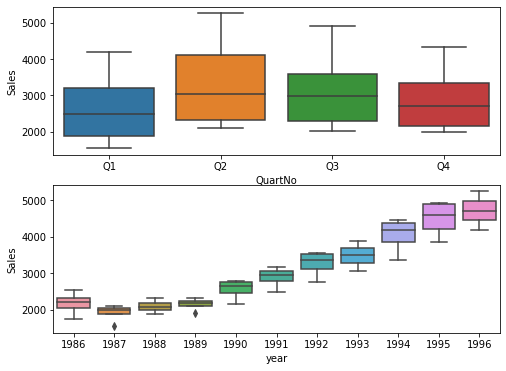

In [36]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="QuartNo",y="Sales",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=df)

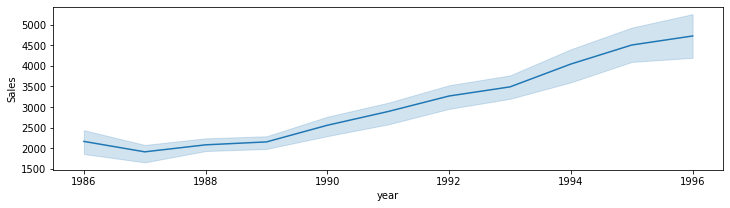

In [37]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=df1)

In [39]:
df1.head()

,Quarter,Sales,t,t_square,logSales,year,QuartNo_Q1,QuartNo_Q2,QuartNo_Q3,QuartNo_Q4
0,Q1_86,1734.827000,1,1,3.239256,1986,1,0,0,0
1,Q2_86,2244.960999,2,4,3.351209,1986,0,1,0,0
2,Q3_86,2533.804993,3,9,3.403773,1986,0,0,1,0
3,Q4_86,2154.962997,4,16,3.333440,1986,0,0,0,1
4,Q1_87,1547.818996,5,25,3.189720,1987,1,0,0,0


#Splitting data

In [40]:
Train = df1.head(36)
Test = df1.tail(6)

In [41]:
Train

,Quarter,Sales,t,t_square,logSales,year,QuartNo_Q1,QuartNo_Q2,QuartNo_Q3,QuartNo_Q4
0,Q1_86,1734.827000,1,1,3.239256,1986,1,0,0,0
1,Q2_86,2244.960999,2,4,3.351209,1986,0,1,0,0
2,Q3_86,2533.804993,3,9,3.403773,1986,0,0,1,0
3,Q4_86,2154.962997,4,16,3.333440,1986,0,0,0,1
4,Q1_87,1547.818996,5,25,3.189720,1987,1,0,0,0
5,Q2_87,2104.411995,6,36,3.323131,1987,0,1,0,0
6,Q3_87,2014.362999,7,49,3.304138,1987,0,0,1,0
7,Q4_87,1991.746998,8,64,3.299234,1987,0,0,0,1
8,Q1_88,1869.049999,9,81,3.271621,1988,1,0,0,0
9,Q2_88,2313.631996,10,100,3.364294,1988,0,1,0,0


In [42]:
Test

,Quarter,Sales,t,t_square,logSales,year,QuartNo_Q1,QuartNo_Q2,QuartNo_Q3,QuartNo_Q4
36,Q1_95,3854.0,37,1369,3.585912,1995,1,0,0,0
37,Q2_95,4936.0,38,1444,3.693375,1995,0,1,0,0
38,Q3_95,4895.0,39,1521,3.689753,1995,0,0,1,0
39,Q4_95,4333.0,40,1600,3.636789,1995,0,0,0,1
40,Q1_96,4194.0,41,1681,3.622628,1996,1,0,0,0
41,Q2_96,5253.0,42,1764,3.720407,1996,0,1,0,0


In [43]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

667.4256979280374

In [44]:
#Exponential

Exp = smf.ols('logSales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

4565.587721707515

In [45]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

485.1406702070385

In [46]:
#Additive seasonality 

add_sea = smf.ols('Sales~QuartNo_Q1+QuartNo_Q2+QuartNo_Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['QuartNo_Q1','QuartNo_Q2','QuartNo_Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1895.5593132150464

In [48]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+QuartNo_Q1+QuartNo_Q2+QuartNo_Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['QuartNo_Q1','QuartNo_Q2','QuartNo_Q3','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

283.06196057038085

In [49]:
##Multiplicative Seasonality

Mul_sea = smf.ols('logSales~QuartNo_Q1+QuartNo_Q2+QuartNo_Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

4572.794689931083

In [50]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('logSales~t+QuartNo_Q1+QuartNo_Q2+QuartNo_Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

4565.576579227473

In [51]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,283.061961
2,rmse_Quad,485.140670
0,rmse_linear,667.425698
3,rmse_add_sea,1895.559313
6,rmse_Mult_add_sea,4565.576579
1,rmse_Exp,4565.587722
5,rmse_Mult_sea,4572.794690


Predict for new time period

In [67]:
predict_data = pd.read_excel (r'/content/CocaCola_Sales_predict.xlsx')
predict_data.head()

,Quarter,t,t_square,year,QuartNo
0,Q3_96,43,1849,1996,Q3
1,Q4_96,44,1936,1996,Q4
2,Q1_97,45,2025,1997,Q1
3,Q2_97,46,2116,1997,Q2
4,Q3_97,47,2209,1997,Q3


In [68]:
df2=pd.get_dummies(predict_data,columns=['QuartNo'])

In [69]:
df2

,Quarter,t,t_square,year,QuartNo_Q1,QuartNo_Q2,QuartNo_Q3,QuartNo_Q4
0,Q3_96,43,1849,1996,0,0,1,0
1,Q4_96,44,1936,1996,0,0,0,1
2,Q1_97,45,2025,1997,1,0,0,0
3,Q2_97,46,2116,1997,0,1,0,0
4,Q3_97,47,2209,1997,0,0,1,0
5,Q4_97,48,2304,1997,0,0,0,1


In [70]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+QuartNo_Q1+QuartNo_Q2+QuartNo_Q3',data=df1).fit()

In [71]:
pred_new  = pd.Series(model_full.predict(df2))
pred_new

0    5319.754557
1    5137.955882
2    5069.668337
3    5866.186600
4    5942.178733
5    5774.444481
dtype: float64

In [72]:
df2["forecasted_Sales"] = pd.Series(pred_new)

In [73]:
df2

,Quarter,t,t_square,year,QuartNo_Q1,QuartNo_Q2,QuartNo_Q3,QuartNo_Q4,forecasted_Sales
0,Q3_96,43,1849,1996,0,0,1,0,5319.754557
1,Q4_96,44,1936,1996,0,0,0,1,5137.955882
2,Q1_97,45,2025,1997,1,0,0,0,5069.668337
3,Q2_97,46,2116,1997,0,1,0,0,5866.186600
4,Q3_97,47,2209,1997,0,0,1,0,5942.178733
5,Q4_97,48,2304,1997,0,0,0,1,5774.444481


In [74]:
new_var = pd.concat([df1,df2])

In [75]:
new_var

,Quarter,Sales,t,t_square,logSales,year,QuartNo_Q1,QuartNo_Q2,QuartNo_Q3,QuartNo_Q4,forecasted_Sales
0,Q1_86,1734.827000,1,1,3.239256,1986,1,0,0,0,NaN
1,Q2_86,2244.960999,2,4,3.351209,1986,0,1,0,0,NaN
2,Q3_86,2533.804993,3,9,3.403773,1986,0,0,1,0,NaN
3,Q4_86,2154.962997,4,16,3.333440,1986,0,0,0,1,NaN
4,Q1_87,1547.818996,5,25,3.189720,1987,1,0,0,0,NaN
5,Q2_87,2104.411995,6,36,3.323131,1987,0,1,0,0,NaN
6,Q3_87,2014.362999,7,49,3.304138,1987,0,0,1,0,NaN
7,Q4_87,1991.746998,8,64,3.299234,1987,0,0,0,1,NaN
8,Q1_88,1869.049999,9,81,3.271621,1988,1,0,0,0,NaN
9,Q2_88,2313.631996,10,100,3.364294,1988,0,1,0,0,NaN


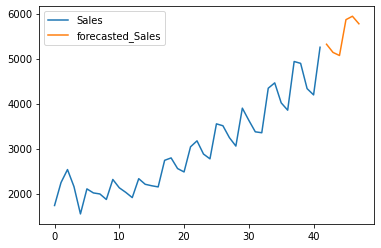

In [76]:
new_var[['Sales','forecasted_Sales']].reset_index(drop=True).plot()